<a href="https://colab.research.google.com/github/WestonMadeira1/HW_4/blob/main/HW4_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


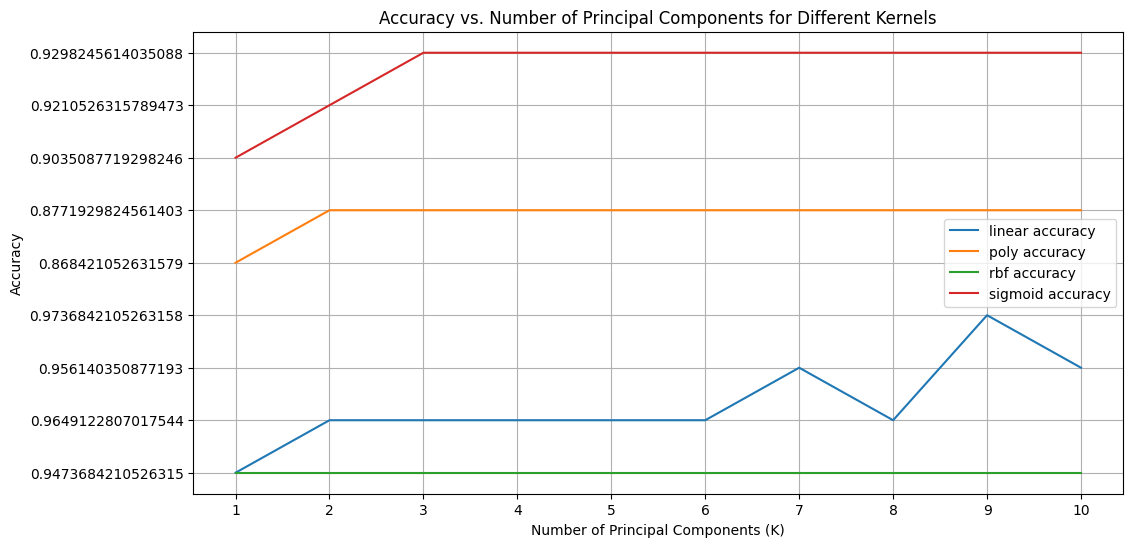

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load your cancer dataset and preprocess it
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ML Data/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()
varlist =  ['diagnosis']

def binary_map(x):
    return x.map({'M': 1, 'B': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)
dataset.head()

# Initialize parameters
X = dataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
y = dataset.iloc[:, 1].values
K_values = range(1, 11)  # Set the range of K values to consider
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # List of kernel functions to try
results = []

# Loop through different values of K and kernel functions
for K in K_values:
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(X)  # Transform your data using PCA

    for kernel in kernels:
        clf = SVC(kernel=kernel)
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

        # Train the SVM classifier
        clf.fit(X_train, y_train)

        # Predict and evaluate the model
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        results.append((K, kernel, accuracy, precision, recall))

# Visualize the results
results = np.array(results)
plt.figure(figsize=(12, 6))

for kernel in kernels:
    subset = results[results[:, 1] == kernel]
    plt.plot(subset[:, 0], subset[:, 2], label=f'{kernel} accuracy')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy vs. Number of Principal Components for Different Kernels')
plt.show()
